In [33]:
import pandas as pd
import seaborn as sn

In [2]:
# make a DataFrame whith ALL the events
events = ['../data/events_France.json', '../data/events_Germany.json', 
           '../data/events_Italy.json', '../data/events_Spain.json']
e = pd.read_json('../data/events_England.json')
df_events = pd.DataFrame(e)
for i in range(len(events)):
    df_events = df_events.append(pd.DataFrame(pd.read_json(events[i])), ignore_index = True)
df_events

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175
...,...,...,...,...,...,...,...,...,...,...,...,...
3071390,8,Simple pass,[{'id': 1801}],20623,"[{'y': 25, 'x': 66}, {'y': 2, 'x': 88}]",2565927,Pass,682,2H,2939.077491,85,253302671
3071391,7,Acceleration,[{'id': 1801}],122832,"[{'y': 2, 'x': 88}, {'y': 21, 'x': 97}]",2565927,Others on the ball,682,2H,2940.515560,70,253302673
3071392,8,Cross,"[{'id': 401}, {'id': 1802}]",122832,"[{'y': 21, 'x': 97}, {'y': 26, 'x': 92}]",2565927,Pass,682,2H,2942.098761,80,253302674
3071393,8,Simple pass,[{'id': 1801}],40756,"[{'y': 74, 'x': 8}, {'y': 56, 'x': 9}]",2565927,Pass,675,2H,2943.089232,85,253302698


In [3]:
def goal(tags):
    for el in tags:
        if el['id'] == 101 or el['id'] == 102:
            return 1
    return 0

In [4]:
# drop the events without the tag goal or autogol and the event 'save attempt' otherwise we have duplicates of goals
df_events = df_events[(df_events['tags'].apply(goal) != 0) & (df_events['eventId'] != 9)]
df_events

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212
91,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100,177959280
554,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",12829,"[{'y': 54, 'x': 94}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,1710.855093,100,177959759
898,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",7945,"[{'y': 50, 'x': 92}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,2815.900791,100,177960130
1107,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",12829,"[{'y': 54, 'x': 92}, {'y': 100, 'x': 100}]",2499719,Shot,1631,2H,634.312236,100,177960379
...,...,...,...,...,...,...,...,...,...,...,...,...
3069312,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",32968,"[{'y': 33, 'x': 84}, {'y': 0, 'x': 0}]",2565926,Shot,712,2H,2032.390946,100,253222480
3069762,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",8278,"[{'y': 48, 'x': 86}, {'y': 100, 'x': 100}]",2565927,Shot,675,1H,612.380233,100,253300739
3070201,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",3322,"[{'y': 48, 'x': 93}, {'y': 100, 'x': 100}]",2565927,Shot,675,1H,1893.736105,100,253301228
3070981,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",267134,"[{'y': 29, 'x': 88}, {'y': 0, 'x': 0}]",2565927,Shot,682,2H,1501.813224,100,253302208


In [5]:
df_events.reset_index(drop = True, inplace = True)
df_events

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212
1,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100,177959280
2,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",12829,"[{'y': 54, 'x': 94}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,1710.855093,100,177959759
3,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",7945,"[{'y': 50, 'x': 92}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,2815.900791,100,177960130
4,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",12829,"[{'y': 54, 'x': 92}, {'y': 100, 'x': 100}]",2499719,Shot,1631,2H,634.312236,100,177960379
...,...,...,...,...,...,...,...,...,...,...,...,...
4941,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",32968,"[{'y': 33, 'x': 84}, {'y': 0, 'x': 0}]",2565926,Shot,712,2H,2032.390946,100,253222480
4942,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",8278,"[{'y': 48, 'x': 86}, {'y': 100, 'x': 100}]",2565927,Shot,675,1H,612.380233,100,253300739
4943,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",3322,"[{'y': 48, 'x': 93}, {'y': 100, 'x': 100}]",2565927,Shot,675,1H,1893.736105,100,253301228
4944,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",267134,"[{'y': 29, 'x': 88}, {'y': 0, 'x': 0}]",2565927,Shot,682,2H,1501.813224,100,253302208


In [6]:
df_goals = df_events[['playerId', 'teamId', 'matchPeriod', 'eventSec']]
df_goals

,playerId,teamId,matchPeriod,eventSec
0,25413,1609,1H,94.595788
1,14763,1631,1H,254.745027
2,12829,1631,1H,1710.855093
3,7945,1609,1H,2815.900791
4,12829,1631,2H,634.312236
...,...,...,...,...
4941,32968,712,2H,2032.390946
4942,8278,675,1H,612.380233
4943,3322,675,1H,1893.736105
4944,267134,682,2H,1501.813224


In [9]:
df_goals.to_json('../data/allGoals.json', orient='records', lines=True)   # create another json lighter

In [4]:
goals = pd.read_json('../data/allGoals.json', lines = True)
df_goals = pd.DataFrame(goals)
df_goals

,playerId,teamId,matchPeriod,eventSec
0,25413,1609,1H,94.595788
1,14763,1631,1H,254.745027
2,12829,1631,1H,1710.855093
3,7945,1609,1H,2815.900791
4,12829,1631,2H,634.312236
...,...,...,...,...
4941,32968,712,2H,2032.390946
4942,8278,675,1H,612.380233
4943,3322,675,1H,1893.736105
4944,267134,682,2H,1501.813224


In [31]:
def time_slot(row):
    h = row['matchPeriod']
    m = row['eventSec']/60
    if h == '1H':
        if 0 <= m < 9:
            return 'Slot1'                  # [0, 9)
        elif 9 <= m < 18:
            return 'Slot2'                  # [9, 18)
        elif 18 <= m < 27:
            return 'Slot3'                  # [18, 27)
        elif 27 <= m < 36:
            return 'Slot4'                  # [27, 36)
        elif 36 <= m < 45:
            return 'Slot5'                  # [36, 45)
        else:
            return 'Extra1'                 # 45+
    if h == '2H':
        if 0 <= m < 9:
            return 'Slot6'                  # [45, 54)
        elif 9 <= m < 18:
            return 'Slot7'                  # [54, 63)
        elif 18 <= m < 27:
            return 'Slot8'                  # [63, 72)
        elif 27 <= m < 36:
            return 'Slot9'                  # [72, 81)
        elif 36 <= m < 45:
            return 'Slot10'                 # [81, 90)
        else:
            return 'Extra2'                 # 90+
    return

In [32]:
df_goals['timeSlot'] = df_goals.apply(time_slot, axis=1)  # axis = 1 apply time_slot to every single row
df_goals

,playerId,teamId,matchPeriod,eventSec,timeSlot
0,25413,1609,1H,94.595788,Slot1
1,14763,1631,1H,254.745027,Slot1
2,12829,1631,1H,1710.855093,Slot4
3,7945,1609,1H,2815.900791,Extra1
4,12829,1631,2H,634.312236,Slot7
...,...,...,...,...,...
4941,32968,712,2H,2032.390946,Slot9
4942,8278,675,1H,612.380233,Slot2
4943,3322,675,1H,1893.736105,Slot4
4944,267134,682,2H,1501.813224,Slot8


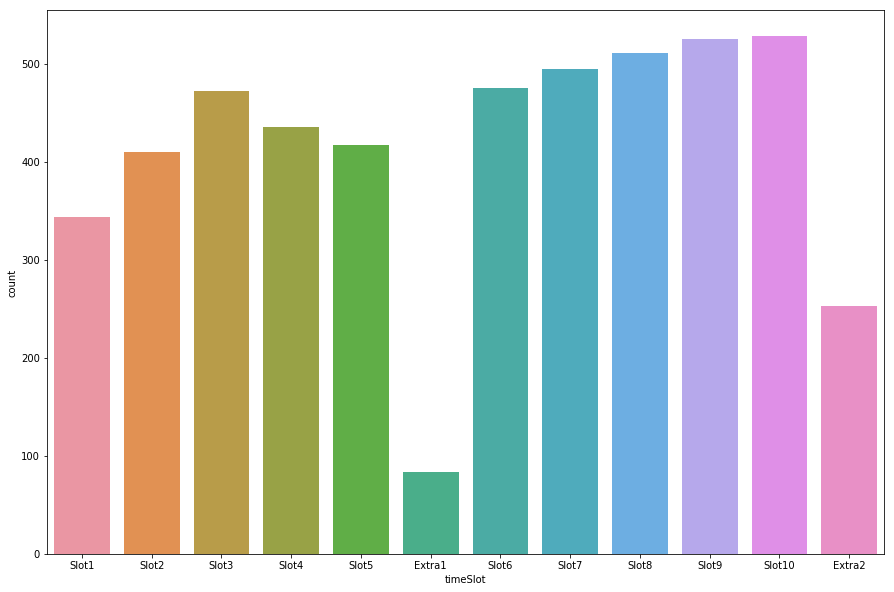

In [46]:
# absolute prequency of goals in the time slots
# aggiungere legenda    es: Slot1 = [0, 9) 
# aggiungere x label
# aggiungere y label
# aggiungere titolo
goals_barPlot = sn.countplot(x=df_goals['timeSlot'], data=df_goals, order=['Slot1','Slot2','Slot3','Slot4','Slot5','Extra1',
                                                                           'Slot6','Slot7','Slot8','Slot9','Slot10','Extra2'])
goals_barPlot.figure.set_size_inches(15,10)
goals_barPlot

In [114]:
# top ten teams Slot10 [81, 90)
df_slot10 = df_goals[df_goals['timeSlot'] == 'Slot10']
df_slot10

,playerId,teamId,matchPeriod,eventSec,timeSlot
5,7870,1609,2H,2231.119656,Slot10
6,26010,1609,2H,2374.620655,Slot10
13,7892,1610,2H,2540.902004,Slot10
20,134513,1611,2H,2513.380731,Slot10
21,7936,1611,2H,2669.799980,Slot10
...,...,...,...,...,...
4851,4131,698,2H,2542.282136,Slot10
4857,3529,682,2H,2451.618664,Slot10
4866,14836,701,2H,2628.570360,Slot10
4889,4440,677,2H,2538.085792,Slot10


In [115]:
df_slot10 = df_slot10.groupby(['teamId']).teamId.agg('count').to_frame('goals')
df_slot10

,goals
teamId,
674,9
675,14
676,19
677,5
678,1
...,...
3795,3
3799,5
3804,3


In [119]:
df_team10 = df_slot10.sort_values(by = 'goals', ascending = False)[:11]
df_team10    # actually 11 cause same number of goals

,goals
teamId,
676,19
675,14
3767,14
1625,13
3162,12
3774,12
1609,11
2444,10
1610,10


In [120]:
# load teams for names
t = pd.read_json('../data/teams.json')
df_teams = pd.DataFrame(t)
df_teams = df_teams[['wyId', 'officialName']]
df_teams.rename(columns = {'wyId' : 'teamId'}, inplace = True)
df_team10 = pd.merge(df_team10, df_teams, on = 'teamId')
df_team10 = df_team10[['teamId','goals','officialName']]
df_team10
# printare in modo carino i nomi

,teamId,goals,officialName
0,676,19,FC Barcelona
1,675,14,Real Madrid Club de F\u00fatbol
2,3767,14,Paris Saint-Germain FC
3,1625,13,Manchester City FC
4,3162,12,SS Lazio
5,3774,12,Stade Rennais FC
6,1609,11,Arsenal FC
7,2444,10,FC Bayern M\u00fcnchen
8,1610,10,Chelsea FC
9,687,10,Real Sociedad de F\u00fatbol


In [229]:
# players able to score in 8 different intervals
# select player id and timeslot, and then drop duplicates
df_players_slots = df_goals[['playerId', 'timeSlot']]
df_players_slots = df_players_slots.drop_duplicates()
df_players_slots = df_players_slots.groupby('playerId').count()
df_players_slots = df_players_slots[df_players_slots['timeSlot'] >= 8]
df_players_slots
# 75 players scored in 8 or more different time slots

,timeSlot
playerId,
118,9
122,10
3287,8
3314,8
3322,11
...,...
300485,9
340386,9
353833,9
